## Logistic Regression

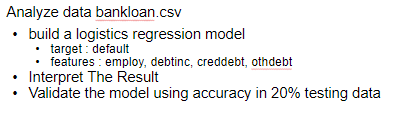

In [1]:
import pandas as pd
import numpy as np

In [7]:
bankloan = pd.read_csv('../../data/bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [8]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [9]:
X = bankloan[fitur]
y = bankloan[target]

In [10]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


## Modelling

In [11]:
import statsmodels.api as sm

In [12]:
sm_logit = sm.Logit(y, sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [13]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:                  0.2844
Time:                        21:33:46   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

## Collinearity

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif

In [16]:
calc_vif(X)

,variable,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


## Model Interpretation

In [20]:
# employ feature interpretation
1/np.exp(-0.2436*1)
# employ = Ketika employment meningkat 1 tahun, dan tidak ada perubahan pada variable yang lain, maka resiko untuk default akan turun 1.275 x

1.2758338948511925

In [21]:
# debt income ratio interpretation
np.exp(0.0885*1)
# debtinc = ketika ratio debt income naik 1, dan tidak ada perubahan pada variable yang lain, maka resiko default akan naik 1.092534 x

1.0925342526104793

In [23]:
# creddebt interpretation
np.exp(0.5041*(10-5))
# creddebt = ketika creddebt naik $5 dan tidak ada perubahan pada variable yang lain, maka resiko default akan naik 12.43 x
# creddebt = nasabah yang memiliki creddebt $10 memiliki resiko default 12.43 x lebih tinggi daripada nasabah yang memiliki creddebt $5.

12.434812515742879

LLR-Test:
<br>
B1, B2, B3, B4 : P-Value of the Log-Likelihood Ratio is below 0.05. We have enough evidence that minimal either employ, debtinc, creddebt, othdebt have significant effect to credit default rate.
<br>
Wald Test:
1. B0 : P-Value of the partial test is below 0.05. We need B0 in the model
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that employ decrease default rate
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that debtinc increase default rate.
1. B3 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that creddebt increase default rate.
1. B4 : P-Value of the partial test is greater than 0.05. With significant level of 5%, we dont have enough evidence that othdebt has significant effect to default rate

Parameter Estimate:
1. B1 = -0.2436 : Employment decrease default rate. When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times 
1. B2 = 0.0885 : Ratio debt to income increase default rate. When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times
1. B3 = 0.5041 :  creddebt increase default rate. When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
Pseudo R-Square = 28.44% : This model can explain 28.44% variation of default rate.

## Validation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1000000000
                                                   )

In [36]:
y['default'].value_counts(normalize=True)

0    0.738571
1    0.261429
Name: default, dtype: float64

In [37]:
y_train['default'].value_counts(normalize=True)

0    0.739286
1    0.260714
Name: default, dtype: float64

In [38]:
y_test['default'].value_counts(normalize=True)

0    0.735714
1    0.264286
Name: default, dtype: float64

In [57]:
y_train.index

Int64Index([229, 428, 320, 337, 526, 469, 411, 136, 618, 550,
            ...
            270, 329, 370, 135, 593, 306, 417, 521, 172, 271],
           dtype='int64', length=560)

In [58]:
y_test.index

Int64Index([145,  61, 475, 655, 247, 492,  85, 209,  57, 190,
            ...
             42,  40, 491,  22, 437, 620, 119, 502, 415, 533],
           dtype='int64', length=140)